In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("sales_data.csv")

df.head(10)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
5,2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
6,2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0
7,2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0
8,2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0
9,2018-06-08,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0


### 1. Total Sales by Manager

- **Grouping and Summing Sales:**
  - **`df.groupby('Manager')`**: Groups the data in the DataFrame `df` by the values in the `Manager` column, creating separate groups for each unique manager.
  - **`['Sale_amt'].sum()`**: Calculates the sum of `Sale_amt` for each manager, aggregating the sales data.
  - **`.reset_index()`**: Converts the grouped data back into a DataFrame with `Manager` as a regular column and `Sale_amt` as the total sales amount for each manager.

- **Sorting:**
  - **`total_sales_by_manager.sort_values(by='Sale_amt', ascending=False)`**: Sorts the DataFrame by the `Sale_amt` column in descending order to display managers with the highest total sales at the top.

- **Visualization:**
  - **`plt.figure(figsize=(10, 6))`**: Sets the size of the figure to 10 inches wide by 6 inches tall.
  - **`sns.barplot(x='Sale_amt', y='Manager', data=total_sales_by_manager, palette='viridis', hue='Manager')`**: Creates a bar plot using Seaborn. The x-axis represents the total sales amount, and the y-axis represents the managers. The 'viridis' color palette is used for the bars. The `hue='Manager'` parameter is used to avoid deprecation warnings.
  - **`plt.title('Total Sales by Manager')`**: Sets the title of the plot.
  - **`plt.xlabel('Total Sales Amount')`**: Labels the x-axis as 'Total Sales Amount'.
  - **`plt.ylabel('Manager')`**: Labels the y-axis as 'Manager'.
  - **`plt.show()`**: Displays the plot.


#### Final Output
The resulting bar chart visualizes the total sales amount for each manager, sorted from highest to lowest sales, making it easy to compare the performance of different managers.


In [65]:
total_sales_by_manager = df.groupby('Manager')['Sale_amt'].sum().reset_index()

total_sales_by_manager = total_sales_by_manager.sort_values(by= 'Sale_amt', ascending=False)

total_sales_by_manager

,Manager,Sale_amt
2,Martha,472493.0
1,Hermann,365108.5
0,Douglas,239056.0
3,Timothy,229018.0


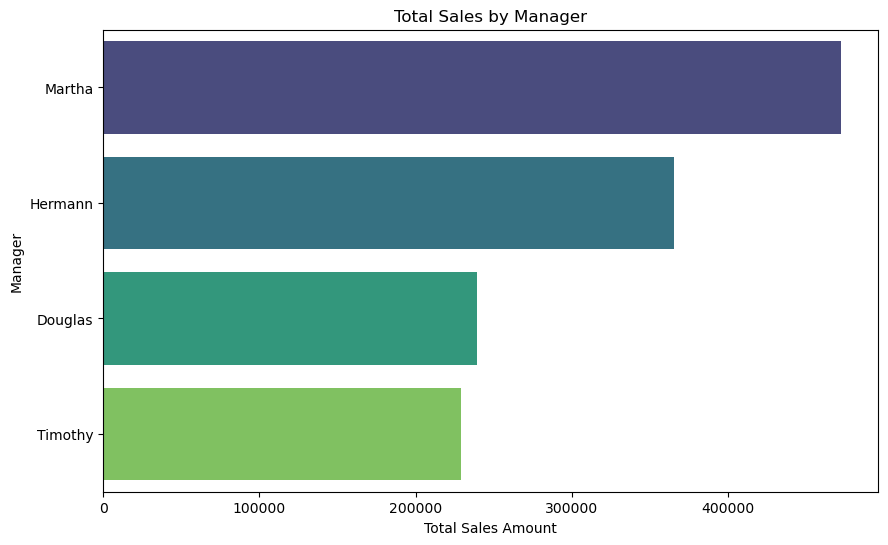

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sale_amt', y='Manager', data=total_sales_by_manager, palette='viridis', hue='Manager')
plt.title('Total Sales by Manager')
plt.xlabel('Total Sales Amount')
plt.ylabel('Manager')
plt.show()

### 2. Transaction Count by Manager


1. **Count Transactions by 'Manager':**
   - **`df['Manager'].value_counts()`**: Counts the number of occurrences of each unique value in the 'Manager' column. This results in a Series where the index represents the manager names and the values represent the counts of transactions for each manager.
   - **`.reset_index()`**: Converts the Series into a DataFrame with the manager names as a column and the transaction counts as another column.
   - **`transaction_count_by_manager.columns = ['Manager', 'Transaction Count']`**: Renames the columns of the DataFrame to 'Manager' and 'Transaction Count' for clarity.

2. **Visualization using Pie Chart:**
   - **`plt.figure(figsize=(8, 8))`**: Creates a new figure with a size of 8 inches by 8 inches.
   - **`plt.pie()`**: Generates a pie chart.
     - **`transaction_count_by_manager['Transaction Count']`**: Provides the data for the pie chart, representing the sizes of the pie slices.
     - **`labels=transaction_count_by_manager['Manager']`**: Labels each slice of the pie with the corresponding manager name.
     - **`autopct='%1.1f%%'`**: Displays the percentage of each slice in the pie chart.
     - **`startangle=140`**: Rotates the start angle of the pie chart for better orientation.
     - **`colors=sns.color_palette('viridis', len(transaction_count_by_manager))`**: Specifies a color palette from Seaborn with as many colors as there are slices in the pie chart.
   - **`plt.title('Transaction Count by Manager')`**: Sets the title of the pie chart.
   - **`plt.axis('equal')`**: Ensures the pie chart is drawn as a circle rather than an ellipse.
   - **`plt.show()`**: Displays the pie chart.


In [67]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [68]:
transaction_count_by_manager = df['Manager'].value_counts().reset_index()

transaction_count_by_manager.columns = ['Manager', 'Transaction Count']

transaction_count_by_manager

,Manager,Transaction Count
0,Martha,14
1,Hermann,12
2,Timothy,9
3,Douglas,8


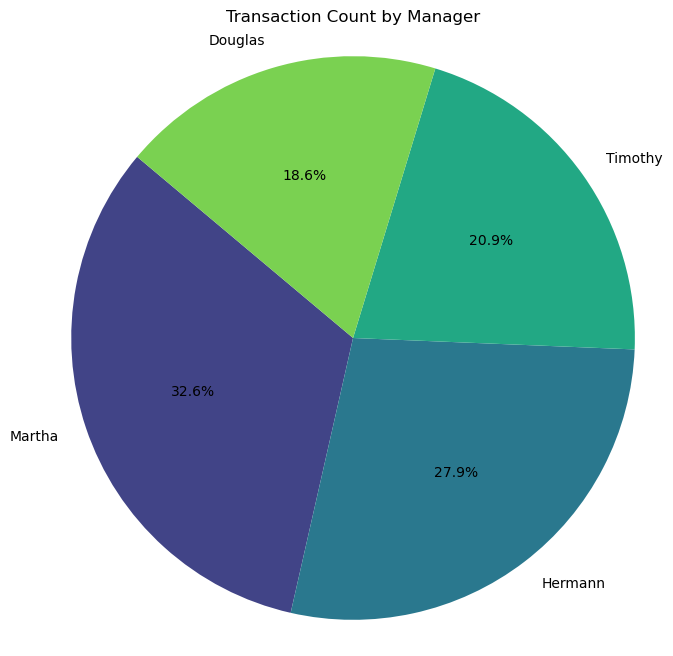

In [69]:
plt.figure(figsize=(8,8))

plt.pie( transaction_count_by_manager['Transaction Count'], labels=transaction_count_by_manager['Manager'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(transaction_count_by_manager)) )

plt.title("Transaction Count by Manager")
plt.axis('equal')
plt.show()

### 3. Average Sale Amount by Manager


1. **Calculate Average Sales by Manager:**
   - **`df.groupby('Manager')['Sale_amt'].mean().reset_index()`**:
     - **`df.groupby('Manager')`**: Groups the data in the DataFrame `df` by the 'Manager' column, creating groups where each unique manager forms a separate group.
     - **`['Sale_amt'].mean()`**: Calculates the mean (average) sales amount for each manager group.
     - **`.reset_index()`**: Converts the resulting grouped data back into a DataFrame, with 'Manager' as a regular column rather than an index.
   - **`average_sales_by_manager = average_sales_by_manager.sort_values(by='Sale_amt', ascending=False)`**:
     - Sorts the DataFrame by 'Sale_amt' (now 'Average_Sale') in descending order, so that managers with the highest average sales are listed first.
   - **`average_sales_by_manager.columns = ['Manager', 'Average_Sale']`**:
     - Renames the columns of the DataFrame to 'Manager' and 'Average_Sale' for clarity.

2. **Visualization using Line Plot:**
   - **`plt.figure(figsize=(10, 6))`**:
     - Creates a new figure with a size of 10 inches by 6 inches.
   - **`sns.lineplot(x='Manager', y='Average_Sale', data=average_sales_by_manager, markers='o', sort=False)`**:
     - **`sns.lineplot()`**: Creates a line plot using Seaborn.
     - **`x='Manager'`**: Sets the x-axis to represent the managers.
     - **`y='Average_Sale'`**: Sets the y-axis to represent the average sales amount.
     - **`data=average_sales_by_manager`**: Uses the DataFrame containing average sales data.
     - **`markers='o'`**: Adds markers to the line plot at each data point.
     - **`sort=False`**: Ensures that the data is plotted in the order it appears in the DataFrame, rather than sorting it automatically.
   - **`plt.title("Average Sale Amount By Managers")`**:
     - Sets the title of the plot.
   - **`plt.xlabel('Manager')`**:
     - Labels the x-axis as 'Manager'.
   - **`plt.ylabel('Average Sale Amount')`**:
     - Labels the y-axis as 'Average Sale Amount'.
   - **`plt.xticks(rotation=45)`**:
     - Rotates the x-axis labels by 45 degrees for better readability, especially if there are many managers.
   - **`plt.show()`**:
     - Displays the plot.


In [70]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [71]:
average_sales_by_manager = df.groupby('Manager')['Sale_amt'].mean().reset_index()

average_sales_by_manager = average_sales_by_manager.sort_values(by='Sale_amt', ascending=False)

average_sales_by_manager.columns = ['Manager', 'Average_Sale']

average_sales_by_manager

,Manager,Average_Sale
2,Martha,33749.500000
1,Hermann,30425.708333
0,Douglas,29882.000000
3,Timothy,25446.444444


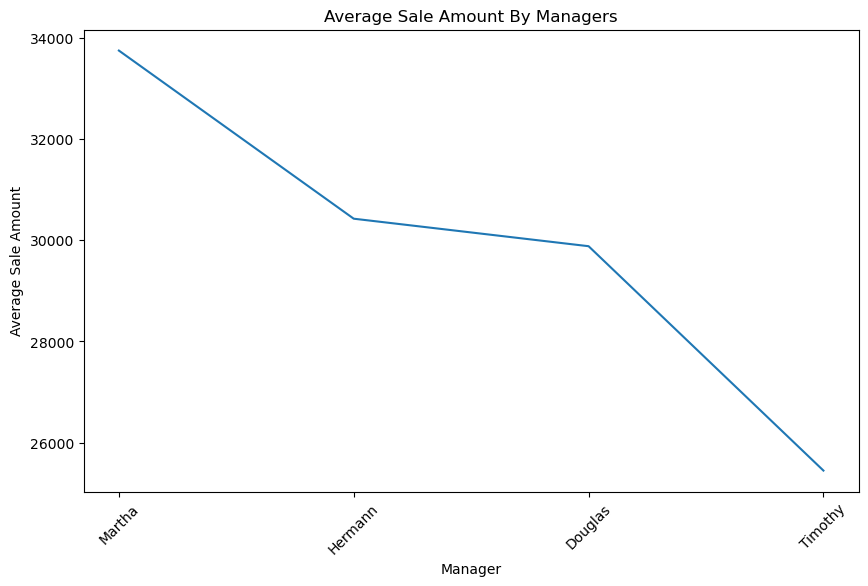

In [72]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Manager', y='Average_Sale', data=average_sales_by_manager, markers='o', sort=False)

plt.title("Average Sale Amount By Managers")
plt.xlabel('Manager')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)

plt.show()

### 4. Salesman Contribution Analysis

1. **Group by 'Manager' and 'SalesMan' and Sum 'Sale_amt':**
   - **`df.groupby(['Manager', 'SalesMan'])['Sale_amt'].sum().reset_index()`**:
     - **`df.groupby(['Manager', 'SalesMan'])`**: Groups the data by both the 'Manager' and 'SalesMan' columns, creating a separate group for each combination of manager and salesperson.
     - **`['Sale_amt'].sum()`**: Sums the 'Sale_amt' (sales amount) for each group (each manager-salesman pair).
     - **`.reset_index()`**: Converts the grouped data back into a DataFrame with 'Manager' and 'SalesMan' as regular columns.

2. **Find the Top Salesman for Each Manager:**
   - **`salesman_contribution.loc[salesman_contribution.groupby('Manager')['Sale_amt'].idxmax()]`**:
     - **`salesman_contribution.groupby('Manager')['Sale_amt'].idxmax()`**: Identifies the index of the row where the 'Sale_amt' is the highest for each manager. This effectively finds the top salesman for each manager.
     - **`loc[]`**: Filters the DataFrame using these indices to create a new DataFrame that only contains the top salespeople for each manager.

3. **Visualization Using Stacked Bar Chart:**
   - **`plt.figure(figsize=(12, 8))`**:
     - Creates a new figure with a size of 12 inches by 8 inches.
   - **`salesman_contribution.pivot(index='Manager', columns='SalesMan', values='Sale_amt').fillna(0)`**:
     - **`.pivot()`**: Converts the data into a pivot table where the 'Manager' is the index, 'SalesMan' is the columns, and 'Sale_amt' is the values. Each manager now has a set of columns representing their salespeople's total sales.
     - **`.fillna(0)`**: Fills any missing values with 0 in case some salespeople have no sales for a particular manager.
   - **`.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))`**:
     - **`kind='bar'`**: Specifies that a bar plot should be created.
     - **`stacked=True`**: Stacks the bars on top of each other to show how much each salesperson contributes to their manager's total sales.
     - **`colormap='viridis'`**: Uses the 'viridis' color palette for the plot.
   - **`plt.title('Salesman Contribution to Total Sales by Manager')`**: Sets the title of the chart.
   - **`plt.xlabel('Manager')`**: Labels the x-axis as 'Manager'.
   - **`plt.ylabel('Total Sales Amount')`**: Labels the y-axis as 'Total Sales Amount'.
   - **`plt.show()`**: Displays the stacked bar chart.


In [73]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [74]:
salesman_contribution = df.groupby(['Manager', 'SalesMan'])['Sale_amt'].sum().reset_index()

top_salesman_per_manager = salesman_contribution.loc[salesman_contribution.groupby('Manager')['Sale_amt'].idxmax()]

In [75]:
salesman_contribution

,Manager,SalesMan,Sale_amt
0,Douglas,John,124016.0
1,Douglas,Karen,48204.0
2,Douglas,Michael,66836.0
3,Hermann,Luis,206373.0
4,Hermann,Shelli,33698.0
5,Hermann,Sigal,125037.5
6,Martha,Alexander,236703.0
7,Martha,Diana,36100.0
8,Martha,Steven,199690.0
9,Timothy,David,140955.0


In [76]:
top_salesman_per_manager

,Manager,SalesMan,Sale_amt
0,Douglas,John,124016.0
3,Hermann,Luis,206373.0
6,Martha,Alexander,236703.0
9,Timothy,David,140955.0


<Figure size 1200x800 with 0 Axes>

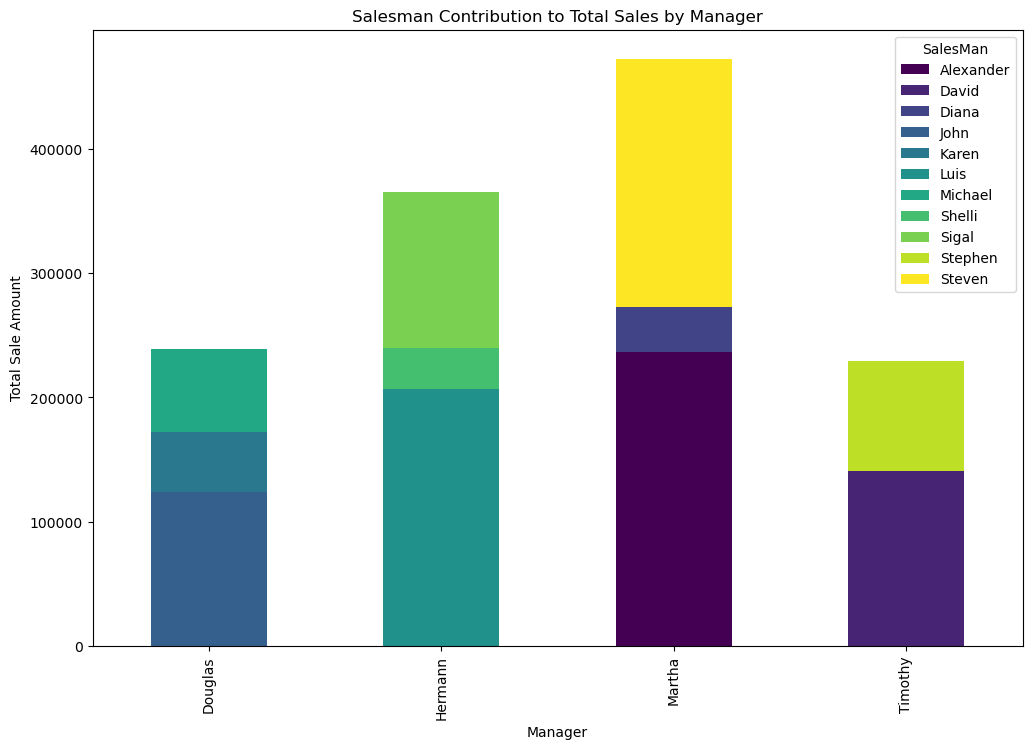

In [77]:
plt.figure(figsize=(12,8))

salesman_contribution_pivot = salesman_contribution.pivot(index='Manager', columns='SalesMan', values='Sale_amt').fillna(0)

salesman_contribution_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,8))
plt.title( 'Salesman Contribution to Total Sales by Manager')
plt.xlabel('Manager')
plt.ylabel('Total Sale Amount')

plt.show()

### 5. Region-wise Sales Analysis

- **`sales_by_region = df.groupby('Region')['Sale_amt'].sum().reset_index()`**: This line groups the DataFrame `df` by the 'Region' column and sums the 'Sale_amt' for each region. The result is then reset to a regular DataFrame format.
  
- **`plt.figure(figsize=(10, 6))`**: Initializes a figure for the plot with a size of 10 inches in width and 6 inches in height.

- **`sns.barplot(x='Sale_amt', y='Region', data=sales_by_region, palette='viridis', hue='Region')`**: 
   - This creates a bar plot using Seaborn, where the x-axis represents the total sales amount (`Sale_amt`), and the y-axis represents the regions (`Region`).
   - The `palette='viridis'` applies the 'viridis' color palette to the bars.
   - The `hue='Region'` argument colors each bar based on the region.

- **`plt.title('Total Sales by Region')`**: Sets the title of the chart to 'Total Sales by Region'.

- **`plt.xlabel('Total Sales Amount')`**: Sets the x-axis label to 'Total Sales Amount'.

- **`plt.ylabel('Region')`**: Sets the y-axis label to 'Region'.

- **`plt.show()`**: Displays the plot.


In [78]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [79]:
sales_by_region = df.groupby('Region')['Sale_amt'].sum().reset_index()

sales_by_region

,Region,Sale_amt
0,Central,829769.5
1,East,321007.0
2,West,154899.0


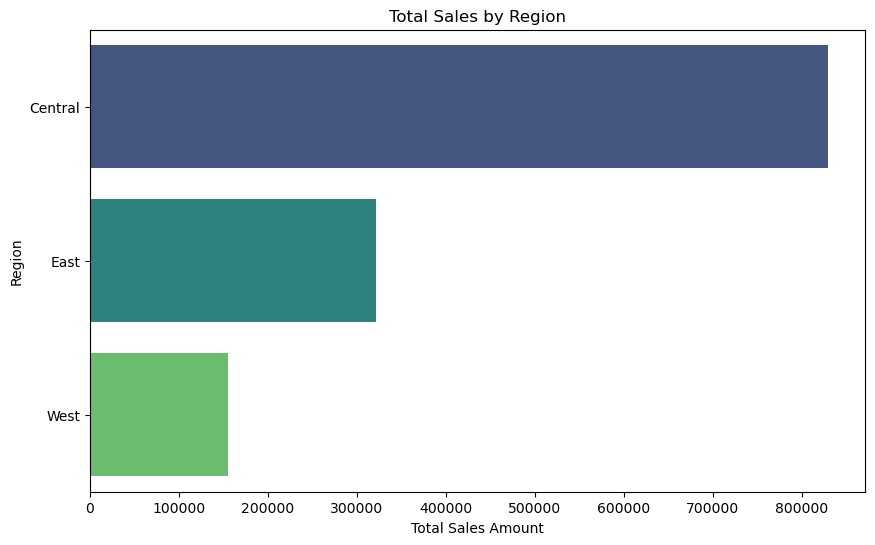

In [80]:
plt.figure(figsize=(10,6))

sns.barplot(x='Sale_amt', y='Region', data=sales_by_region, palette='viridis', hue='Region')

plt.title('Total Sales by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()